In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import time
from IPython.core.debugger import set_trace

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
df = pd.read_csv('CBA.AX5y.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-21,76.000000,76.889999,75.900002,76.070000,60.625332,4104401
1,2017-09-22,76.199997,77.050003,76.180000,76.620003,61.063652,2170239
2,2017-09-25,77.029999,77.269997,75.739998,75.809998,60.418121,2003512
3,2017-09-26,75.800003,75.860001,75.080002,75.099998,59.852276,2552948
4,2017-09-27,75.080002,75.349998,74.610001,74.849998,59.653019,2688235
...,...,...,...,...,...,...,...
1262,2022-09-15,94.849998,95.339996,94.660004,95.059998,95.059998,3364419
1263,2022-09-16,94.550003,95.279999,94.044998,94.230003,94.230003,5980478
1264,2022-09-19,94.250000,95.029999,94.250000,94.660004,94.660004,1474030
1265,2022-09-20,95.949997,96.800003,95.660004,96.529999,96.529999,2389248


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df['movement'] = df['close']-df['open']
df

,date,open,high,low,close,adj close,volume,movement
0,2017-09-21,76.000000,76.889999,75.900002,76.070000,60.625332,4104401,0.070000
1,2017-09-22,76.199997,77.050003,76.180000,76.620003,61.063652,2170239,0.420006
2,2017-09-25,77.029999,77.269997,75.739998,75.809998,60.418121,2003512,-1.220001
3,2017-09-26,75.800003,75.860001,75.080002,75.099998,59.852276,2552948,-0.700005
4,2017-09-27,75.080002,75.349998,74.610001,74.849998,59.653019,2688235,-0.230004
...,...,...,...,...,...,...,...,...
1262,2022-09-15,94.849998,95.339996,94.660004,95.059998,95.059998,3364419,0.210000
1263,2022-09-16,94.550003,95.279999,94.044998,94.230003,94.230003,5980478,-0.320000
1264,2022-09-19,94.250000,95.029999,94.250000,94.660004,94.660004,1474030,0.410004
1265,2022-09-20,95.949997,96.800003,95.660004,96.529999,96.529999,2389248,0.580002


In [7]:
# preparing the dataset by shifting the mean by 1
steps=-1
dfpred= df.copy()
dfpred['actual']=dfpred['movement'].shift(steps)
dfpred.head(3)

,date,open,high,low,close,adj close,volume,movement,actual
0,2017-09-21,76.000000,76.889999,75.900002,76.070000,60.625332,4104401,0.070000,0.420006
1,2017-09-22,76.199997,77.050003,76.180000,76.620003,61.063652,2170239,0.420006,-1.220001
2,2017-09-25,77.029999,77.269997,75.739998,75.809998,60.418121,2003512,-1.220001,-0.700005


In [8]:
dfpred.tail()

,date,open,high,low,close,adj close,volume,movement,actual
1262,2022-09-15,94.849998,95.339996,94.660004,95.059998,95.059998,3364419,0.210000,-0.320000
1263,2022-09-16,94.550003,95.279999,94.044998,94.230003,94.230003,5980478,-0.320000,0.410004
1264,2022-09-19,94.250000,95.029999,94.250000,94.660004,94.660004,1474030,0.410004,0.580002
1265,2022-09-20,95.949997,96.800003,95.660004,96.529999,96.529999,2389248,0.580002,-0.419998
1266,2022-09-21,96.279999,96.279999,95.750000,95.860001,95.860001,128860,-0.419998,NaN


In [9]:
dfpred = dfpred.dropna()

In [10]:
dfpred.tail()

,date,open,high,low,close,adj close,volume,movement,actual
1261,2022-09-14,95.629997,95.680000,94.430000,94.459999,94.459999,2958659,-1.169998,0.210000
1262,2022-09-15,94.849998,95.339996,94.660004,95.059998,95.059998,3364419,0.210000,-0.320000
1263,2022-09-16,94.550003,95.279999,94.044998,94.230003,94.230003,5980478,-0.320000,0.410004
1264,2022-09-19,94.250000,95.029999,94.250000,94.660004,94.660004,1474030,0.410004,0.580002
1265,2022-09-20,95.949997,96.800003,95.660004,96.529999,96.529999,2389248,0.580002,-0.419998


In [11]:
dfpred = dfpred.set_index('date')
dfpred.index = pd.to_datetime(dfpred.index)

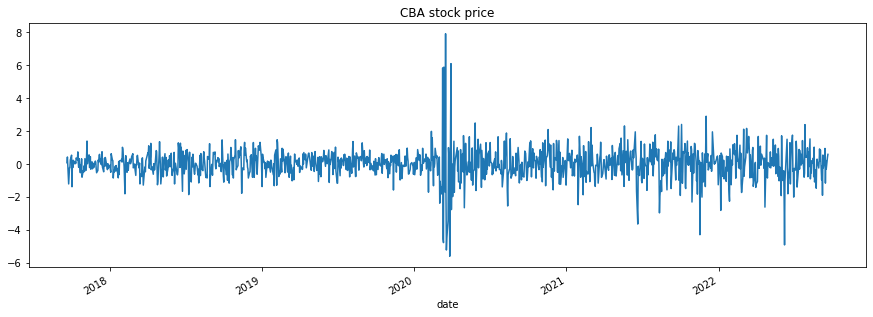

In [12]:
dfpred['movement'].plot(style='-',
        figsize=(15, 5),
        title='CBA stock price')
plt.show()

In [13]:
dfpred.index.dayofweek

Int64Index([3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
            ...
            2, 3, 4, 0, 1, 2, 3, 4, 0, 1],
           dtype='int64', name='date', length=1266)

In [14]:
def create_features(dfpred):
    """
    Create time series features based on time series index.
    """
    dfpred = dfpred.copy()
    dfpred['dayofweek'] = dfpred.index.dayofweek
    dfpred['quarter'] = dfpred.index.quarter
    dfpred['month'] = dfpred.index.month
    dfpred['year'] = dfpred.index.year
    return dfpred

dfpred = create_features(dfpred)

In [15]:
dfpred

,open,high,low,close,adj close,volume,movement,actual,dayofweek,quarter,month,year
date,,,,,,,,,,,,
2017-09-21,76.000000,76.889999,75.900002,76.070000,60.625332,4104401,0.070000,0.420006,3,3,9,2017
2017-09-22,76.199997,77.050003,76.180000,76.620003,61.063652,2170239,0.420006,-1.220001,4,3,9,2017
2017-09-25,77.029999,77.269997,75.739998,75.809998,60.418121,2003512,-1.220001,-0.700005,0,3,9,2017
2017-09-26,75.800003,75.860001,75.080002,75.099998,59.852276,2552948,-0.700005,-0.230004,1,3,9,2017
2017-09-27,75.080002,75.349998,74.610001,74.849998,59.653019,2688235,-0.230004,-0.229995,2,3,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14,95.629997,95.680000,94.430000,94.459999,94.459999,2958659,-1.169998,0.210000,2,3,9,2022
2022-09-15,94.849998,95.339996,94.660004,95.059998,95.059998,3364419,0.210000,-0.320000,3,3,9,2022
2022-09-16,94.550003,95.279999,94.044998,94.230003,94.230003,5980478,-0.320000,0.410004,4,3,9,2022


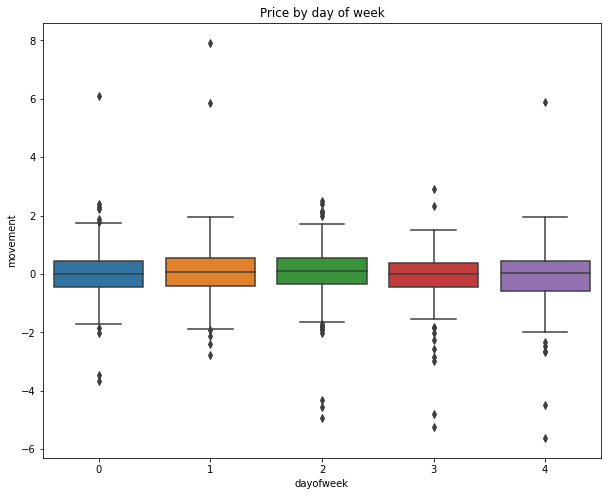

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfpred, x='dayofweek', y='movement')
ax.set_title('Price by day of week')
plt.show()

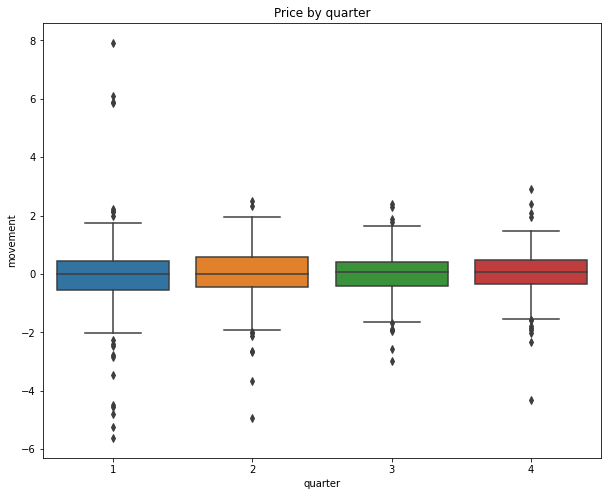

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfpred, x='quarter', y='movement')
ax.set_title('Price by quarter')
plt.show()

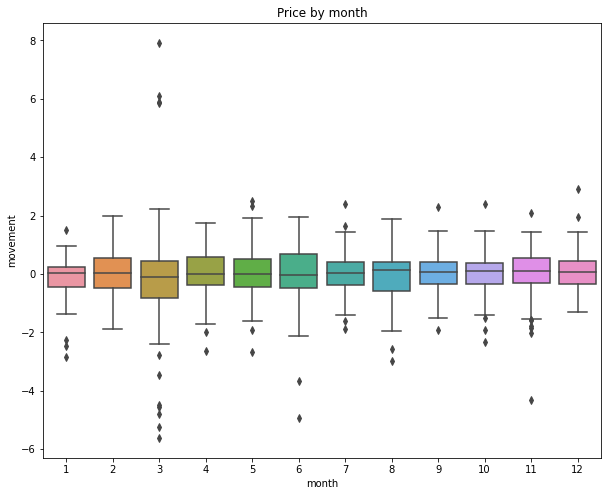

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfpred, x='month', y='movement')
ax.set_title('Price by month')
plt.show()

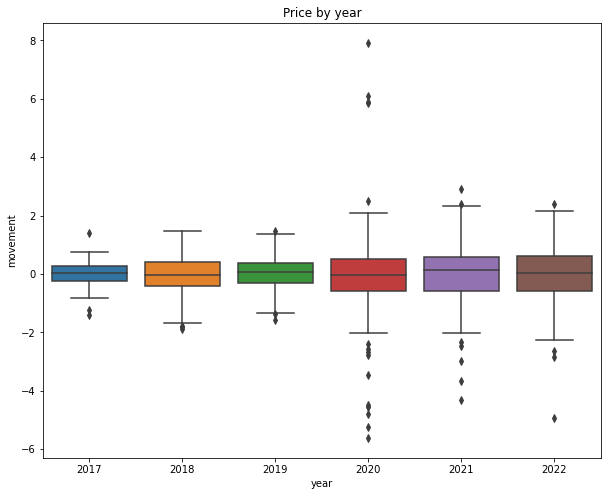

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=dfpred, x='year', y='movement')
ax.set_title('Price by year')
plt.show()

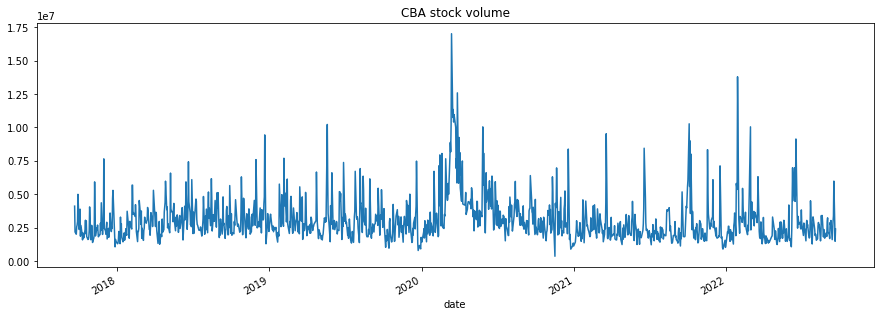

In [21]:
dfpred['volume'].plot(style='-',
        figsize=(15, 5),
        title='CBA stock volume')
plt.show()

In [22]:
# normalizing input features
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dfpred[['low', 'high','open', 'close', 'volume', 'adj close', 'movement','dayofweek', 'quarter', 'month', 'year']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [23]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.402293,0.364382,0.370254,0.390371,0.225164,0.195181,0.420236,0.75,0.666667,0.727273,0.0
1,0.407308,0.367437,0.373958,0.400215,0.109147,0.202937,0.446086,1.00,0.666667,0.727273,0.0
2,0.399427,0.371636,0.389331,0.385717,0.099146,0.191515,0.324963,0.00,0.666667,0.727273,0.0
3,0.387605,0.344722,0.366549,0.373009,0.132103,0.181502,0.363367,0.25,0.666667,0.727273,0.0
4,0.379187,0.334988,0.353214,0.368534,0.140218,0.177976,0.398079,0.50,0.666667,0.727273,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1261,0.734193,0.723039,0.733840,0.719528,0.156438,0.793896,0.328656,0.50,0.666667,0.727273,1.0
1262,0.738313,0.716549,0.719392,0.730267,0.180777,0.804513,0.430576,0.75,0.666667,0.727273,1.0
1263,0.727297,0.715404,0.713836,0.715411,0.337697,0.789826,0.391433,1.00,0.666667,0.727273,1.0
1264,0.730969,0.710632,0.708279,0.723107,0.067386,0.797435,0.445347,0.00,0.666667,0.727273,1.0


In [24]:
X.rename(columns={0:'low', 1:'high',2:'open', 3:'close', 4:'volume', 5:'adj close', 6:'movement',7:'dayofweek', 8:'quarter', 9:'month', 10:'year'}, inplace=True)
X = pd.DataFrame(X)
X.index = dfpred.index
X.tail(5)

,low,high,open,close,volume,adj close,movement,dayofweek,quarter,month,year
date,,,,,,,,,,,
2022-09-14,0.734193,0.723039,0.733840,0.719528,0.156438,0.793896,0.328656,0.50,0.666667,0.727273,1.0
2022-09-15,0.738313,0.716549,0.719392,0.730267,0.180777,0.804513,0.430576,0.75,0.666667,0.727273,1.0
2022-09-16,0.727297,0.715404,0.713836,0.715411,0.337697,0.789826,0.391433,1.00,0.666667,0.727273,1.0
2022-09-19,0.730969,0.710632,0.708279,0.723107,0.067386,0.797435,0.445347,0.00,0.666667,0.727273,1.0
2022-09-20,0.756224,0.744417,0.739767,0.756578,0.122283,0.830525,0.457903,0.25,0.666667,0.727273,1.0


In [25]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dfpred[['actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [26]:
y

,0
0,0.446086
1,0.324963
2,0.363367
3,0.398079
4,0.398080
...,...
1261,0.430576
1262,0.391433
1263,0.445347
1264,0.457903


In [27]:
y.rename(columns={0:'movement_next_day'}, inplace= True)
y.index=dfpred.index
y.head(2)

,movement_next_day
date,
2017-09-21,0.446086
2017-09-22,0.324963


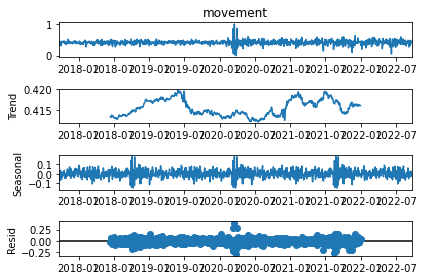

In [28]:
import statsmodels.api as sm
sd=sm.tsa.seasonal_decompose(X['movement'],model='add',period=365);
fig=sd.plot()
fig.set_figheight(4)
plt.show()

### Split data into Train and Test

In [31]:
train_size=int(len(df) *0.60)
val_size=int(len(df) *0.20)
test_size = int(len(df)) - train_size - val_size
print(test_size)

254


In [32]:
train_X, train_y = X[:train_size], y[:train_size]
val_X, val_y = X[:val_size], y[:val_size]
test_X, test_y = X[test_size:], y[test_size:]

In [33]:
test_X.columns

Index(['low', 'high', 'open', 'close', 'volume', 'adj close', 'movement',
       'dayofweek', 'quarter', 'month', 'year'],
      dtype='object')

In [34]:
y_test=y['movement_next_day'][:test_size]

In [35]:
type(y_test)

pandas.core.series.Series

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary for", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [37]:
test_adf(y_test, "CBA stock price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary for CBA stock price


In [38]:
test_adf(y_test.diff(), " CBA stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary for  CBA stock Price


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


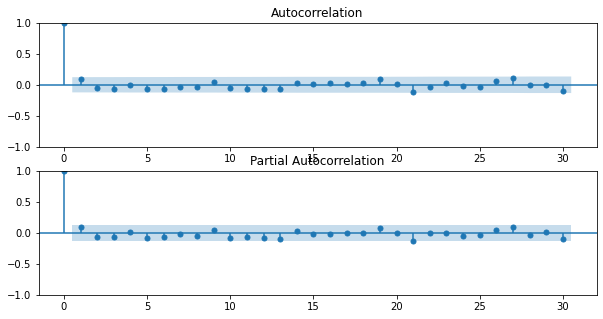

In [39]:
#Correlograms
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=30, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=30, ax=ax[1])
plt.show()

In [40]:
from pmdarima.arima import auto_arima
ar=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=5,  max_q=5, 
                     d=1, max_d=5,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1870.373, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1760.583, Time=0.37 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1824.695, Time=1.35 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1871.627, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1762.581, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1876.888, Time=1.55 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1880.378, Time=1.56 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1885.538, Time=1.69 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1860.423, Time=1.57 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1884.655, Time=1.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1863.537, Time=2.05 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1883.130, Time=1.80 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1855.397, Time=1.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1874.488, Time=2.42 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1891.532, Time=1.71 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1899.255, Time=1.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1885.520, Time=1.54 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1890.263, Time=1.47 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-1934.322, Time=1.86 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1875.542, Time=1.61 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-1898.879, Time=1.83 sec


/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=-1885.444, Time=1.77 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=-1891.315, Time=1.80 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=-1880.966, Time=1.85 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0]          
Total fit time: 39.453 seconds


In [41]:
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  760
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 983.161
Date:                Fri, 07 Oct 2022   AIC                          -1934.322
Time:                        18:17:34   BIC                          -1860.210
Sample:                             0   HQIC                         -1905.781
                                - 760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
low            1.8753      0.283      6.617      0.000       1.320       2.431
high           0.1810      0.247      0.734      0.463      -0.302       0.664
open          -0.5742      0.312     -1.838      0.066      -1.187       0.038
close         -0.5698      0.302     -1.885      0.059      -1.162       0.023
volume         0.0571      0.039      1.458      0.145      -0.020       0.134
adj close     -1.1984      0.469     -2.553      0.011      -2.118      -0.278
movement      -0.0630      0.097     -0.652      0.514      -0.252       0.126
dayofweek     -0.0107      0.009     -1.202      0.230      -0.028       0.007
quarter       -0.0157      0.043     -0.364      0.716      -0.100       0.069
month          0.1310      0.066      1.976      0.048       0.001       0.261
year           0.5314      0.226      2.351      0.019       0.088       0.974
ar.L1         -0.9107      0.038    -23.713      0.000      -0.986      -0.835
ma.L1          0.0883      0.080      1.109      0.268      -0.068       0.244
ma.L2         -0.9183      0.023    -40.382      0.000      -0.963      -0.874
ma.L3         -0.0895      0.074     -1.211      0.226      -0.234       0.055
sigma2         0.0043      0.000     35.301      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              6573.46
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               4.99   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.79e+18. Standard errors may be unstable.
"""

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(1,1,3),
              enforce_invertibility=False, enforce_stationarity=False)

/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
results_val = model.fit()
predictions_val= results_val.predict(start =train_size, end=train_size+val_size+(steps),exog=val_X)
print(len(predictions_val))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.20317D+00    |proj g|=  1.41697D-01

At iterate    5    f= -1.20993D+00    |proj g|=  2.11189D-01

At iterate   10    f= -1.22332D+00    |proj g|=  6.22541D-01

At iterate   15    f= -1.23083D+00    |proj g|=  5.13770D-01

At iterate   20    f= -1.23431D+00    |proj g|=  1.23775D-01

At iterate   25    f= -1.24611D+00    |proj g|=  1.23034D+00

At iterate   30    f= -1.24923D+00    |proj g|=  3.35794D-02

At iterate   35    f= -1.25024D+00    |proj g|=  1.81501D-02

At iterate   40    f= -1.25259D+00    |proj g|=  8.67287D-02

At iterate   45    f= -1.25422D+00    |proj g|=  2.21093D-01

At iterate   50    f= -1.25614D+00    |proj g|=  6.40653D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
forecast_val= results_val.forecast(steps=val_size, exog=val_X)

/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [48]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [49]:
act.head()

,movement_next_day
date,
2020-09-22,0.472673
2020-09-23,0.468242
2020-09-24,0.462334
2020-09-25,0.340473
2020-09-28,0.350812


In [52]:
fc_val= pd.DataFrame(forecast_val)
fc_val.reset_index(drop=True, inplace=True)
fc_val.index=val_X.index
fc_val['actual'] =scaler_output.iloc[val_size:, 0]
fc_val.rename(columns={0:'forecast_val'}, inplace= True)

In [53]:
fc_val.head()

,predicted_mean,actual
date,,
2017-09-21,0.846867,NaN
2017-09-22,0.828728,NaN
2017-09-25,0.862346,NaN
2017-09-26,0.854623,NaN
2017-09-27,0.845254,NaN


In [171]:
fc_cba.columns = ['forecast', 'actual']

In [172]:
fc_cba.head()

,forecast,actual
date,,
2021-09-21,0.821483,0.820089
2021-09-22,0.812877,0.832841
2021-09-23,0.830117,0.843837
2021-09-24,0.841829,0.884310
2021-09-27,0.892872,0.910922


<AxesSubplot:xlabel='date'>

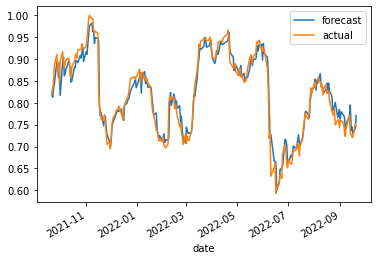

In [173]:
fc_cba['forecast'].plot(legend=True)
fc_cba['actual'].plot(legend=True)

In [179]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['actual'] = act['price_next_day']
predictions.columns = ['pred', 'actual']

In [180]:
predictions

,pred,actual
date,,
2021-09-21,0.821483,0.820089
2021-09-22,0.812877,0.832841
2021-09-23,0.830117,0.843837
2021-09-24,0.841829,0.884310
2021-09-27,0.892872,0.910922
...,...,...
2022-09-14,0.736800,0.727777
2022-09-15,0.744416,0.721539
2022-09-16,0.729488,0.721124


In [181]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['pred'], predictions['actual'])
error

0.022022996621278698

### Inverse Scalar

In [182]:
X.head()

,low,high,open,close,volume,adj close,mean,dayofweek,quarter,month,year
date,,,,,,,,,,,
2017-09-21,0.402293,0.364382,0.370254,0.390371,0.225164,0.195181,0.383940,0.75,0.666667,0.727273,0.0
2017-09-22,0.407308,0.367437,0.373958,0.400215,0.109147,0.202937,0.388006,1.00,0.666667,0.727273,0.0
2017-09-25,0.399427,0.371636,0.389331,0.385717,0.099146,0.191515,0.385973,0.00,0.666667,0.727273,0.0
2017-09-26,0.387605,0.344722,0.366549,0.373009,0.132103,0.181502,0.366845,0.25,0.666667,0.727273,0.0
2017-09-27,0.379187,0.334988,0.353214,0.368534,0.140218,0.177976,0.357790,0.50,0.666667,0.727273,0.0


In [183]:
# invert predictions, scale values back to real index/price range.
test_predict = sc_out.inverse_transform(predictions[['pred']])
test_actual = sc_out.inverse_transform(predictions[['actual']])

In [184]:
act_1=pd.DataFrame(test_actual)

In [ ]:
#act_pred=pd.DataFrame()
act_pred= pd.DataFrame(testPredict)
act_pred.reset_index(drop=True, inplace=True)
act_pred.index=test_X.index
act_pred['Actual'] = act['Stock Price next day']